In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#sns.set(font="Times New Roman")

pd.set_option("display.max_columns", 144)

In [87]:
filename = ['urayasu','chibaharo','kawasaki','1goto']
station  = ['Urayasu','Chibaharo','Kawasaki','1goto']
filepath = '/Users/yulong/GitHub/water/data/TBEIC/urayasu_20140101-20151231.csv'
filepath = '/Users/yulong/GitHub/water/data/TBEIC/chibaharo_20140101-20151231.csv'
filepath = '/Users/yulong/GitHub/water/data/TBEIC/kawasaki_20140101-20151231.csv'
filepath = '/Users/yulong/GitHub/water/data/TBEIC/1goto_20140101-20151231.csv'
col_name = ['年月日時分','気温(℃)','平均風速(m/s)','風向(度)','風向16方位(-)',
            '観測深度(上層)(m)','水温(上層)(℃)','塩分(上層)(-)',
            'DO(上層)(mg/L)','クロロフィルa(上層)(μg/L)',
            '観測深度(中層)(m)','水温(中層)(℃)','塩分(中層)(-)',
            'DO(中層)(mg/L)','クロロフィルa(中層)(μg/L)',
            '観測深度(下層)(m)','水温(下層)(℃)','塩分(下層)(-)',
            'DO(下層)(mg/L)','クロロフィルa(下層)(μg/L)',
            '流速(上層)(cm/s)','流向(上層)(度)','流向16方位(上層)(-)',
            '流速(中層)(cm/s)','流向(中層)(度)','流向16方位(中層)(-)',
            '流速(下層)(cm/s)','流向(下層)(度)','流向16方位(下層)(-)']
col_name = ['DT','TEMa','WND_a','WND_deg','WND_16',
            'DEP_s','TEMw_s','SALw_s',
            'DO_s','Chla_s',
            'DEP_m','TEMw_m','SALw_m',
            'DO_m','Chla_m',
            'DEP_b','TEMw_b','SALw_b',
            'DO_b','Chla_b',
            'CRT_s','CRT_s_deg','CRT_s_16',
            'CRT_m','CRT_m_deg','CRT_m_16',
            'CRT_b','CRT_b_deg','CRT_b_16']
df = pd.read_csv(filepath,names=col_name,header=None,index_col=False,
                 na_values=['99999.99','99999.9','-99999','-1000000'],encoding="SHIFT-JIS",
                 skiprows=1)

In [88]:
df.drop(columns=['WND_16','CRT_s_16','CRT_m_16','CRT_b_16'], inplace=True)
df.DT =  pd.to_datetime(df.DT, format='%Y/%m/%d %H:%M')
df.dropna(subset = ['DO_s'], inplace=True)
df.dropna(subset = ['DO_m'], inplace=True)
df.dropna(subset = ['DO_b'], inplace=True)
df.drop(df[df['TEMw_s'] > 40].index, inplace = True)
df.drop(df[df['TEMw_m'] > 40].index, inplace = True)
df.drop(df[df['TEMw_b'] > 40].index, inplace = True)
df.drop(df[df['SALw_s'] > 45].index, inplace = True)
df.drop(df[df['SALw_m'] > 45].index, inplace = True)
df.drop(df[df['SALw_b'] > 45].index, inplace = True)
df.drop(df[df['SALw_s'] <= 0].index, inplace = True)
df.drop(df[df['SALw_m'] <= 0].index, inplace = True)
df.drop(df[df['SALw_b'] <= 0].index, inplace = True)
df.drop(df[df['DEP_s'] < 0].index, inplace = True)
df.drop(df[df['DEP_m'] < 0].index, inplace = True)
df.drop(df[df['DEP_b'] < 0].index, inplace = True)
df.isnull().sum()
df.head()

,DT,TEMa,WND_a,WND_deg,DEP_s,TEMw_s,SALw_s,DO_s,Chla_s,DEP_m,TEMw_m,SALw_m,DO_m,Chla_m,DEP_b,TEMw_b,SALw_b,DO_b,Chla_b,CRT_s,CRT_s_deg,CRT_m,CRT_m_deg,CRT_b,CRT_b_deg
0,2014-01-01 00:00:00,9.07,4.7,246.3,0.83,10.72,31.34,9.61,10.0,10.06,10.83,31.25,9.48,13.7,18.76,11.82,31.75,7.78,8.8,13.31,75.46,13.57,88.38,2.75,104.79
4,2014-01-01 01:00:00,8.78,4.9,259.9,1.18,10.65,31.31,9.59,7.5,10.41,10.76,31.25,9.40,10.8,19.11,11.80,31.74,7.84,7.6,18.80,88.60,17.92,73.13,3.50,35.36
8,2014-01-01 02:00:00,7.92,4.9,305.6,1.59,10.72,31.34,9.45,10.8,10.83,10.87,31.29,9.19,19.5,19.52,11.78,31.73,7.93,5.6,21.51,96.10,7.34,74.58,4.08,35.46
12,2014-01-01 03:00:00,7.89,5.2,271.9,1.98,10.70,31.35,9.39,8.5,11.22,10.80,31.32,9.24,15.6,19.92,11.99,31.80,7.57,9.3,14.48,100.35,8.14,51.89,5.23,47.85
16,2014-01-01 04:00:00,8.91,4.4,241.4,2.29,10.72,31.38,9.38,10.4,11.53,10.83,31.33,9.18,12.5,20.22,12.16,31.88,7.26,3.7,7.07,127.77,4.87,75.12,3.58,58.39


In [89]:
df.describe()

,TEMa,WND_a,WND_deg,DEP_s,TEMw_s,SALw_s,DO_s,Chla_s,DEP_m,TEMw_m,SALw_m,DO_m,Chla_m,DEP_b,TEMw_b,SALw_b,DO_b,Chla_b,CRT_s,CRT_s_deg,CRT_m,CRT_m_deg,CRT_b,CRT_b_deg
count,15472.000000,15461.000000,15421.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15713.000000,15690.000000,15690.000000,15687.000000,15687.000000,15684.000000,15684.000000
mean,16.812368,5.989302,180.614137,1.820864,18.203120,29.568875,8.817767,19.329065,11.093038,16.899950,32.033260,6.216135,9.500458,19.777205,16.366751,33.404540,3.628949,5.513097,11.993094,189.623698,10.286941,171.238265,6.148485,159.093797
std,7.104692,3.481708,119.451343,0.464735,6.000421,2.609580,1.861549,18.857205,0.486725,4.848468,1.471031,2.909133,9.564364,0.504623,3.691762,0.775017,2.915266,6.351003,28.579200,86.583843,16.917189,93.093472,14.708058,108.267467
min,0.240000,0.000000,0.000000,0.020000,7.580000,0.010000,2.210000,0.300000,0.040000,7.660000,0.020000,0.030000,-0.800000,0.010000,7.710000,0.020000,-0.020000,-0.100000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000
25%,10.460000,3.400000,58.500000,1.510000,12.770000,28.200000,7.510000,7.200000,10.790000,12.790000,31.510000,4.020000,3.600000,19.470000,13.490000,32.950000,0.730000,2.500000,6.302500,123.822500,5.420000,93.765000,2.820000,57.510000
50%,18.030000,5.600000,189.800000,1.860000,18.930000,30.120000,8.640000,14.500000,11.130000,17.770000,32.180000,6.610000,6.200000,19.820000,16.730000,33.490000,3.190000,3.500000,10.320000,202.730000,9.050000,169.950000,5.090000,146.370000
75%,22.200000,8.000000,311.200000,2.170000,22.960000,31.550000,9.850000,25.900000,11.440000,20.420000,32.790000,8.790000,12.200000,20.130000,19.460000,33.940000,6.300000,6.200000,15.510000,250.480000,13.630000,241.205000,8.440000,256.405000
max,33.660000,24.100000,360.000000,3.200000,30.630000,33.680000,23.200000,460.100000,12.280000,28.530000,35.720000,12.270000,189.900000,20.960000,25.400000,35.800000,10.760000,199.100000,2816.050000,360.000000,1588.030000,359.940000,1766.500000,359.920000


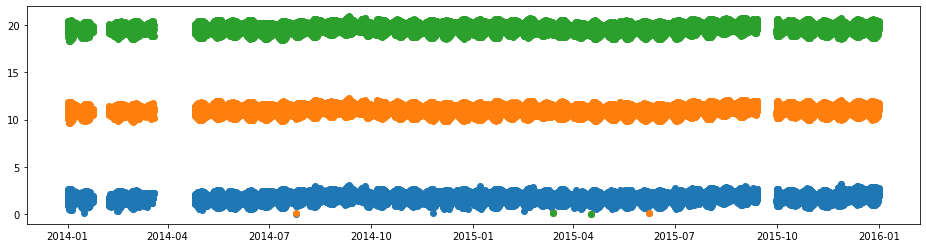

In [90]:
plt.figure(figsize=(16,4))
plt.plot()
plt.scatter(df.DT,df.DEP_s)
plt.scatter(df.DT,df.DEP_m)
plt.scatter(df.DT,df.DEP_b)
plt.show()

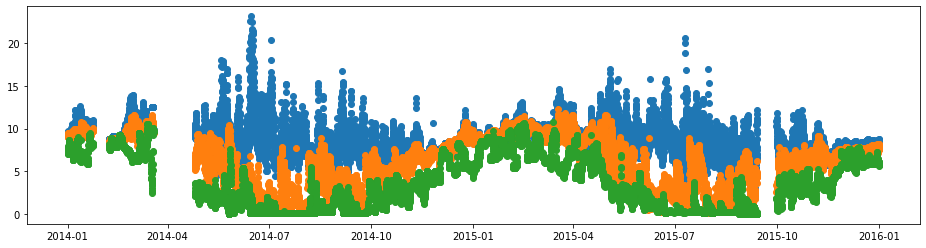

In [91]:
plt.figure(figsize=(16,4))
plt.plot()
plt.scatter(df.DT,df.DO_s)
plt.scatter(df.DT,df.DO_m)
plt.scatter(df.DT,df.DO_b)
plt.show()

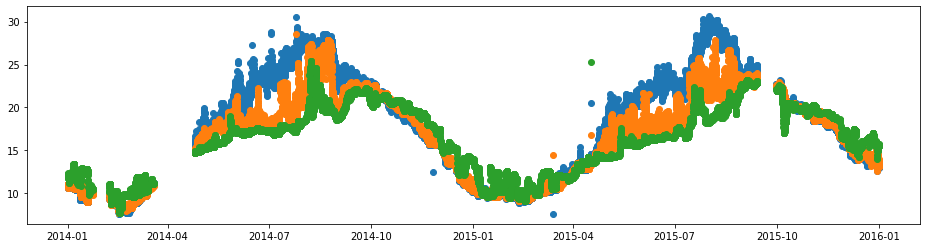

In [92]:
plt.figure(figsize=(16,4))
plt.plot()
plt.scatter(df.DT,df.TEMw_s)
plt.scatter(df.DT,df.TEMw_m)
plt.scatter(df.DT,df.TEMw_b)
plt.show()

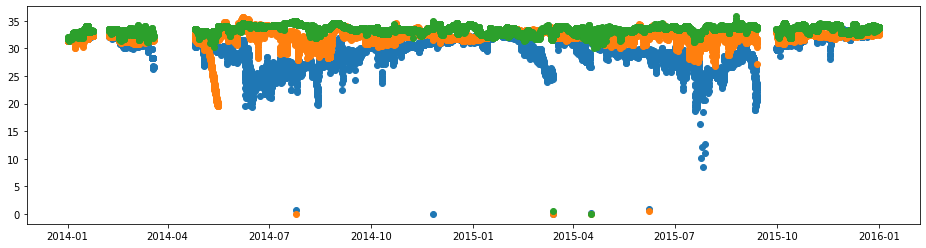

In [93]:
plt.figure(figsize=(16,4))
plt.plot()
plt.scatter(df.DT,df.SALw_s)
plt.scatter(df.DT,df.SALw_m)
plt.scatter(df.DT,df.SALw_b)
plt.show()